### DSC  341 - Foundations of Data Science, DePaul University
### Tim Gamble
# Numerous Approaches for Solving [Digit Recognizer](https://www.kaggle.com/c/digit-recognizer)

---

### Description
The goal of this project is to learn the basics of computer vision by correctly identifying digits from a dataset of handwritten images. The dataset that will be used to build the models can be found on [kaggle](https://www.kaggle.com/c/digit-recognizer).

In this notebook are implementations for the following models:
- Multinominal Linear Regression
- kNN
- Random Forest
- Perceptron Neural Network
- Convolutional Neural Network
 
I used [scikit](https://scikit-learn.org/stable/) to implement linear regression, kNN and random forest models. I used Keras with a Tensorflow backend to build the perceptron neural network as well as the convolutional neural network.

### Evaluation
Accuracy Results:
- Multinominal Linear Regression: 0.91128
- kNN: 0.96614
- Random Forest: 0.96028
- Perceptron Neural Network: 0.97485
- Convolutional Neural Network: 0.98771

As initially hypothesised, the convolutional neural network performed the best. With some further tweaking of parameters and potentially adding additional layers, this approach will yield the best results.

### Outside Sources
In order to implement each of these models, research across a variety of websites had been done. To implement the algorithms in code I used the following sources:
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://keras.io/

The scikit-learn package was used to perform all of the non-neural network based classifications. The Keras package was used exclusivly to perform neural-network based classifications. Further conceptual reading was done outside of these sources.

### How to setup
All of the dependencies should already exist in the env/ folder so this workbook should work out of the box. If this is not the case, then you will need to install all of them.
First, activate the virtual environment:

`source env/bin/activate`

Second, install all of the dependencies:

`pip install -r requirements.txt`

### File Structure

```
|- digit.ipynb (This workbook)
|- images (Images of graphs for each model)
|    |- knn
|    |- random_forest
|    |- regression
|    
|- input (Data from Kaggle)
|    |- test.csv
|    |- train.csv
|    
|- output (Prediction files)
|    |- cnn_prediction.csv (Convolutional Neural Network)
|    |- knn_prediction.csv (kNN)
|    |- lr_prediction.csv (Multinominal Regression)
|    |- nn_prediction.csv (Neural Network)
|    |- rf_prediction.csv (Random Forest)
|    
|- requirements.txt (All the libraries and versions needed to run the workbook)
|- env (The environment used to run this notebook)
```

In [1]:
# Just some helper and init functions for the workbook.

# Suppresses the warnings comming from sklearn
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Given a list, partition l into partitions of length n.
def chunks(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

### Load data and normalize
- Read in the test and train datasets, can be downloaded [here](https://www.kaggle.com/c/digit-recognizer/data)
- Normalize the pixel values on a scale from 0 to 1 by dividing all pixel values by 255
- Separate the labels and the pixel values from the training dataframe and into their own variables (X, y)

In [2]:
import pandas as pd

# Read in the test and train datasets downloaded from Kaggle.
# https://www.kaggle.com/c/digit-recognizer
test_df = pd.read_csv('./input/test.csv').as_matrix()
train_df = pd.read_csv('./input/train.csv').as_matrix()

# Normalize the pixels in the train and test dataframes on a scale from 0 and 1.
# Models perform better when the data is normalized between 0 and 1.
test_df = test_df / 255. 
X = train_df[:, 1:]
y = train_df[:, 0:1]
X = X / 255. 

### Create the training and testing datasets
- When testing a model, use the train_test_split function to genereate labeled train and test data. We use this data in our models to know if we are improving them or not. For submission, don't use this function. Instead use all of the testing data to maximize the accuracy of our model.

In [3]:
from sklearn.model_selection import train_test_split

# Uncomment this to train for testing
# Purpose, be able to determine rough accuracy for Sklearn based models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

# Uncomment this to train for submission
# X_train, y_train = X, y

### Sample of the images being worked with

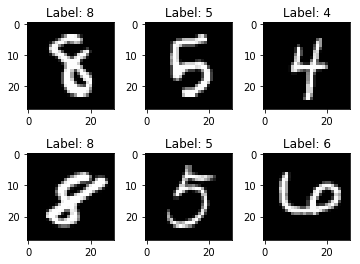

In [5]:
import matplotlib.pyplot as plt
plt.subplots_adjust(hspace=0.5)

# Print some of the images to see what we are working with
for i in range(0, 6):
    plt.subplot(231 + i)
    plt.title("Label: " + str(y_train[i][0]))
    plt.imshow(list(chunks(X_train[i], 28)), cmap=plt.get_cmap('gray'))

plt.show()

### Sklearn model tester and kaggle upload file builder
- Test the accuracy of our sklearn based models 
- If passed an output_file, build a file that is accepted by the kaggle grader

In [6]:
# Given a model, predict a label for our training data and output a file to turn into Kaggle.
# This test_model function only works for models produced using sklearn.
def test_model(model, output_file=None):
    yhat = model.predict(test_df)
    df = pd.DataFrame(data={
        'ImageId': list(range(1, len(yhat)+1)), 
        'Label': yhat
    })
    accuracy = model.score(X_test, y_test)
    if output_file:
        df.to_csv('./output/' + output_file, index = False)
    print(accuracy)

# [Multinominal Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) - Submission Accuracy: 0.91128
### Sklearn LogisticRegression model implementation

In [7]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Build a simple linear regression model with a max iteration of 8 (most optimal). 
# We determined the optimal iterations by testing the scenerio until we leveled off, 
# a graph displaying this process is below.
lr_model = LogisticRegression(max_iter=8)
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=8, multi_class='warn', n_jobs=None,
          penalty='l2', random_state=None, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
test_model(lr_model, 'lr_prediction.csv')

0.915047619047619


![title](images/regression.png)

After running the linear regression with max_iter set from 1 to 15, the max_iter yielding the best results was 8 iterations. Also, using the default 100 max_iter absolutly crushed my laptop so for the model to even build I had to set the max_iter to something less than 20 iterations otherwise it would never finish building.

# [kNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) - Submission Accuracy: 0.96614
### Sklearn KNeighborsClassifier model implementation

In [9]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Build a k-nearest neighbors classifier with n_neighbors set to 3. We decided to set k equal to 3 
# because it maximized the test accuracy as can be seen in the graph plotted below. NOTE: This model 
# does not take very long to build, but to predict takes a while.
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [10]:
test_model(knn_model, 'knn_prediction.csv')

0.9666666666666667


![title](images/knn.png)


# [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) - Submission Accuracy: 0.96028
### Sklearn RandomForestClassifier model implementation

In [11]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Build a simple Random forest classification model. Create 120 trees (most optimal) and merge them together.
# We determined 120 trees by testing variations between 5 and 130 and concluding 120 to yield the best results.
# A graph of accuracy v n_estimators is below.
rf_model = RandomForestClassifier(n_estimators=120)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
test_model(rf_model, 'rf_prediction.csv')

0.9645714285714285


![title](images/random_forest.png)

# [Basic Perceptron](https://keras.io/) using [Tensorflow](https://www.tensorflow.org/) - Submission Accuracy: 0.97485

### Keras neural network implementation with Tensorflow backend

In [13]:
import numpy as np

# Use keras with Tensorflow backend
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten

# Set random seed to make results deterministic
np.random.seed(7)

number_pixels = 28 * 28
number_classes = 10

# Convert classes [0-9] into binary matrix representations. Good practice for multi-class predictions
nn_y_train = np_utils.to_categorical(y_train)
nn_y_test = np_utils.to_categorical(y_test)

Using TensorFlow backend.


In [14]:
def create_nn_model():
    model = Sequential()
    # First layer of neural network. We want there to be a neuron for each pixel.
    model.add(Dense(units=number_pixels, input_dim=number_pixels, kernel_initializer='normal', activation='relu'))
    # A softmax function is used to turn the output into probabilities which can be used to classify the images
    model.add(Dense(units=number_classes, kernel_initializer='normal', activation='softmax'))
    # We use a logarithmic loss function and the adam gradient descent for learning neuron weights.
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

### Perceptron model tester and kaggle upload file builder
- Test the accuracy of our perceptron models
- If passed an output_file, build a file that is accepted by the kaggle grader

In [15]:
def nn_test_model(model, output_file=None):
    yhat = model.predict_classes(test_df.reshape(test_df.shape[0], 784).astype('float32'))
    df = pd.DataFrame(data={
        'ImageId': list(range(1, len(yhat)+1)), 
        'Label': yhat
    })
    accuracy = model.evaluate(nn_X_test, nn_y_test)
    if output_file:
        df.to_csv('./output/' + output_file, index = False)
    print(accuracy[1])

In [16]:
# Flatten image into a single dimension. Cast as 32-bit to save on memory.
nn_X_train = X_train.reshape(X_train.shape[0], number_pixels).astype('float32')
nn_X_test = X_test.reshape(X_test.shape[0], number_pixels).astype('float32')

nn_model = create_nn_model()
# We fit the single layer neural network by building 15 neural networks and merging them into one.
# We have the model update every 100 images, the larger the batch_size, the faster each epoch trains
nn_history = nn_model.fit(nn_X_train, nn_y_train, validation_data=(nn_X_test, nn_y_test), epochs=15, batch_size=100, verbose=2)
# An output for the results of each epoch training is below

Train on 31500 samples, validate on 10500 samples
Epoch 1/15
 - 4s - loss: 0.3011 - acc: 0.9126 - val_loss: 0.1989 - val_acc: 0.9405
Epoch 2/15
 - 4s - loss: 0.1250 - acc: 0.9641 - val_loss: 0.1162 - val_acc: 0.9650
Epoch 3/15
 - 4s - loss: 0.0760 - acc: 0.9778 - val_loss: 0.0990 - val_acc: 0.9709
Epoch 4/15
 - 4s - loss: 0.0502 - acc: 0.9853 - val_loss: 0.0906 - val_acc: 0.9734
Epoch 5/15
 - 4s - loss: 0.0344 - acc: 0.9903 - val_loss: 0.0895 - val_acc: 0.9750
Epoch 6/15
 - 4s - loss: 0.0233 - acc: 0.9941 - val_loss: 0.0827 - val_acc: 0.9765
Epoch 7/15
 - 4s - loss: 0.0161 - acc: 0.9962 - val_loss: 0.0800 - val_acc: 0.9772
Epoch 8/15
 - 4s - loss: 0.0120 - acc: 0.9974 - val_loss: 0.0885 - val_acc: 0.9770
Epoch 9/15
 - 4s - loss: 0.0075 - acc: 0.9990 - val_loss: 0.0863 - val_acc: 0.9780
Epoch 10/15
 - 4s - loss: 0.0053 - acc: 0.9993 - val_loss: 0.0858 - val_acc: 0.9775
Epoch 11/15
 - 4s - loss: 0.0040 - acc: 0.9997 - val_loss: 0.0877 - val_acc: 0.9787
Epoch 12/15
 - 4s - loss: 0.0031 - 

In [17]:
nn_test_model(nn_model, output_file='nn_prediction.csv')

10500/10500 [==============================] - 1s 65us/step
0.9707619047619047


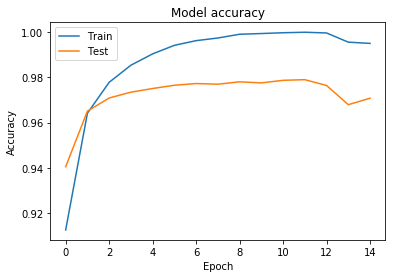

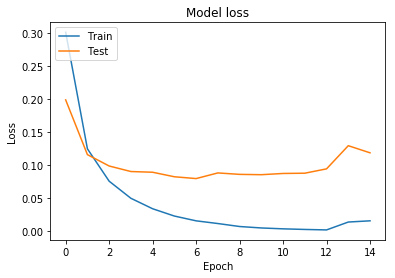

In [18]:
import matplotlib.pyplot as plt

plt.plot(nn_history.history['acc'])
plt.plot(nn_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(nn_history.history['loss'])
plt.plot(nn_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# [Convolutional Neural Network](https://keras.io/) using [Tensorflow](https://www.tensorflow.org/) - Submission Accuracy: 0.98771

### Keras neural network implementation with Tensorflow backend

In [19]:
def create_cnn_model():
    model = Sequential()
    # Our first layer is a convolution layer wich takes our image and scans it with a 5x5 window
    # creating a 2-dimentional activation map that gives the responses of that filter at every 
    # spatial position. Essentially this layer learns about image features rather than single pixels.
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu', dim_ordering='th'))
    # Slide a 2x2 window over the convoluted feature and take the maximum of the four neuron values. 
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Randomly remove 20% of information (pixels/neurons). Prevents overfitting the model.
    model.add(Dropout(0.2))
    # Convert the two dimentional data into one dimension.
    model.add(Flatten())
    # We add one more layer of neurons that activate similarly to our other model, only now we don't need as many.
    model.add(Dense(128, activation='relu'))
    # Use the same output layers as the previous neural network to classify the images.
    model.add(Dense(number_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

### CNN model tester and kaggle upload file builder
- Test the accuracy of our perceptron models
- If passed an output_file, build a file that is accepted by the kaggle grader

In [20]:
def cnn_test_model(model, output_file=None):
    yhat = model.predict_classes(test_df.reshape(test_df.shape[0], 1, 28, 28).astype('float32'))
    df = pd.DataFrame(data={
        'ImageId': list(range(1, len(yhat)+1)), 
        'Label': yhat
    })
    accuracy = model.evaluate(cnn_X_test, nn_y_test)
    if output_file:
        df.to_csv('./output/' + output_file, index = False)
    print(accuracy[1])

In [21]:
# Transform train data into pixels, width, height. We set the scale to be 1 because the images are on a gray scale.
# We would set this to 3 if the colors were RGB for example. Cast as 32-bit to save on memory.
cnn_X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
cnn_X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

cnn_model = create_cnn_model()
# NOTE: The more epochs, the better the results will be but the slower it takes to build.
# A little bit better results but a lot more time to train. Benefits and drawbacks.
cnn_history = cnn_model.fit(cnn_X_train, nn_y_train, validation_data=(cnn_X_test, nn_y_test), epochs=15, batch_size=100, verbose=2)
# An output for the results of each epoch training is below

Train on 31500 samples, validate on 10500 samples
Epoch 1/15
 - 51s - loss: 0.2701 - acc: 0.9192 - val_loss: 0.1124 - val_acc: 0.9675
Epoch 2/15
 - 52s - loss: 0.0873 - acc: 0.9735 - val_loss: 0.0846 - val_acc: 0.9771
Epoch 3/15
 - 50s - loss: 0.0597 - acc: 0.9820 - val_loss: 0.0685 - val_acc: 0.9804
Epoch 4/15
 - 50s - loss: 0.0435 - acc: 0.9868 - val_loss: 0.0651 - val_acc: 0.9809
Epoch 5/15
 - 50s - loss: 0.0376 - acc: 0.9881 - val_loss: 0.0576 - val_acc: 0.9842
Epoch 6/15
 - 50s - loss: 0.0292 - acc: 0.9903 - val_loss: 0.0560 - val_acc: 0.9848
Epoch 7/15
 - 50s - loss: 0.0251 - acc: 0.9918 - val_loss: 0.0595 - val_acc: 0.9824
Epoch 8/15
 - 50s - loss: 0.0202 - acc: 0.9936 - val_loss: 0.0589 - val_acc: 0.9847
Epoch 9/15
 - 50s - loss: 0.0170 - acc: 0.9947 - val_loss: 0.0574 - val_acc: 0.9852
Epoch 10/15
 - 50s - loss: 0.0136 - acc: 0.9954 - val_loss: 0.0531 - val_acc: 0.9855
Epoch 11/15
 - 50s - loss: 0.0128 - acc: 0.9957 - val_loss: 0.0605 - val_acc: 0.9847
Epoch 12/15
 - 50s - los

In [22]:
cnn_test_model(cnn_model, output_file='cnn_prediction.csv')

10500/10500 [==============================] - 10s 910us/step
0.9874285714285714


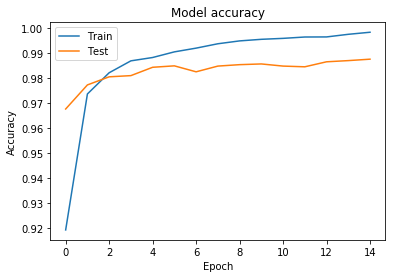

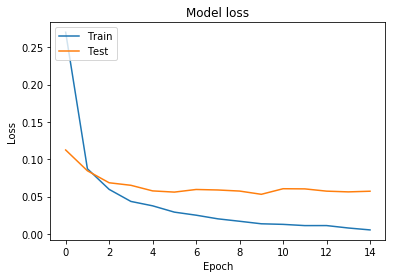

In [23]:
import matplotlib.pyplot as plt
 
plt.plot(cnn_history.history['acc'])
plt.plot(cnn_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()